### Author: Rohan Thakkar

## Introduction to the problem


For this problem, we will be performing some supervised and unsupervised Machine Learning on the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

In [2]:
from sklearn.datasets import load_boston
# Loading the required data set
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print bdata.keys()
print bdata.feature_names
print bdata.data.shape
print bdata.target.shape
print bdata.DESCR

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index 

---

## Part 1: Descriptive analysis

Before beginning the real work, let us first dig into the data a bit do see what we're dealing with.

### 1.1: Histogram of housing prices

Our first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


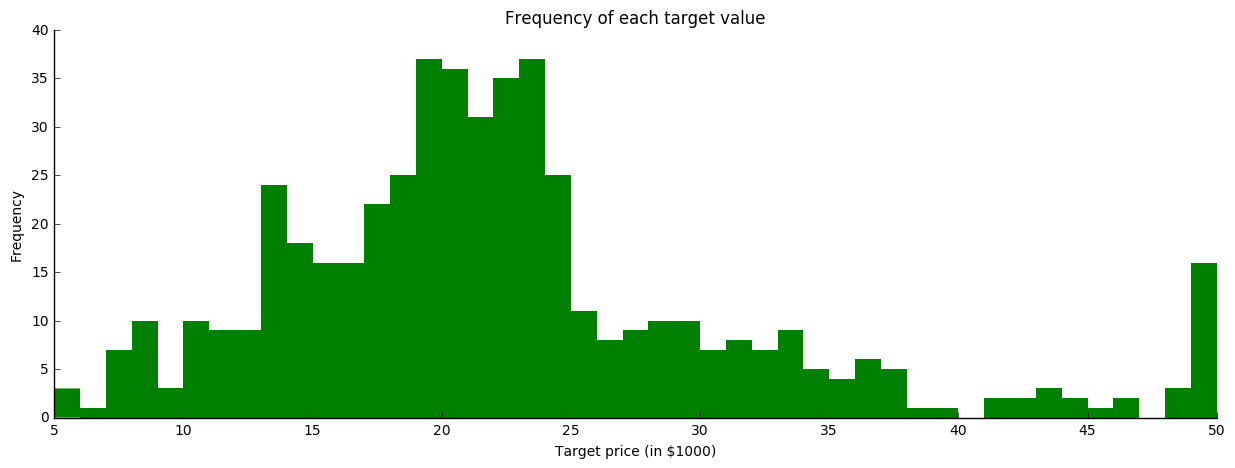

In [4]:
# Prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt 

# Spreading the plot to wider extent
plt.figure(figsize=(15,5))

# Creating a subplot of matplotlib to incorporate required modifications
ax = plt.subplot(111)

# Plotting a histogram onto the plot for the target values in a way that the bins are segregated in 1s instead of 5s so as to set
# the bin width to be $1000 instead of $5000 and setting the color of the histogram to green and remove black borders between bars
ax.hist(bdata.target, bins=np.arange(min(bdata.target), max(bdata.target) + 1, 1), color='green', edgecolor = "none")

# Hiding the right and top axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


# Renaming the title and the axes of the plot
plt.xlabel("Target price (in $1000)")
plt.ylabel("Frequency")
plt.title("Frequency of each target value")

### 1.2: Scatter plot of housing prices and crime

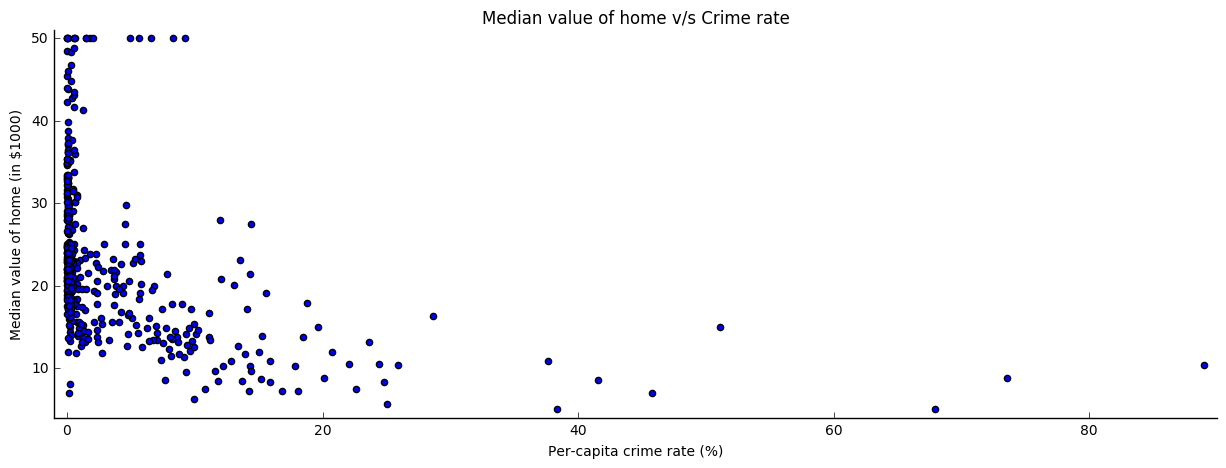

In [5]:
# Creating a final 2-dimensional array consisiting of total 14 columns - 13 indicator variables and target values
data = np.insert(bdata.data, bdata.data.shape[1], bdata.target, axis = 1)

# Spreading the plot to wider extent
plt.figure(figsize=(15,5))

# Plotting a scatterplot with median value of home being Y-axis and per-capita crime rate being X-axis
plt.scatter(data[:,0],data[:,13])

# Creating a subplot of matplotlib to incorporate required modifications
ax = plt.subplot(111)

# Hiding the right and top axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Renaming the X and Y axes and the title of the plot
plt.xlabel("Per-capita crime rate (%)")
plt.ylabel("Median value of home (in $1000)")
plt.title("Median value of home v/s Crime rate")

# Limiting the range of values of X and Y axes to the minimum 
plt.xlim([data[:,0].min()-1,data[:,0].max()+1])
plt.ylim([data[:,13].min()-1,data[:,13].max()+1])

# Display the scatterplot
plt.show()

### 1.3 Visualization: Median value of house against accessibility to highways


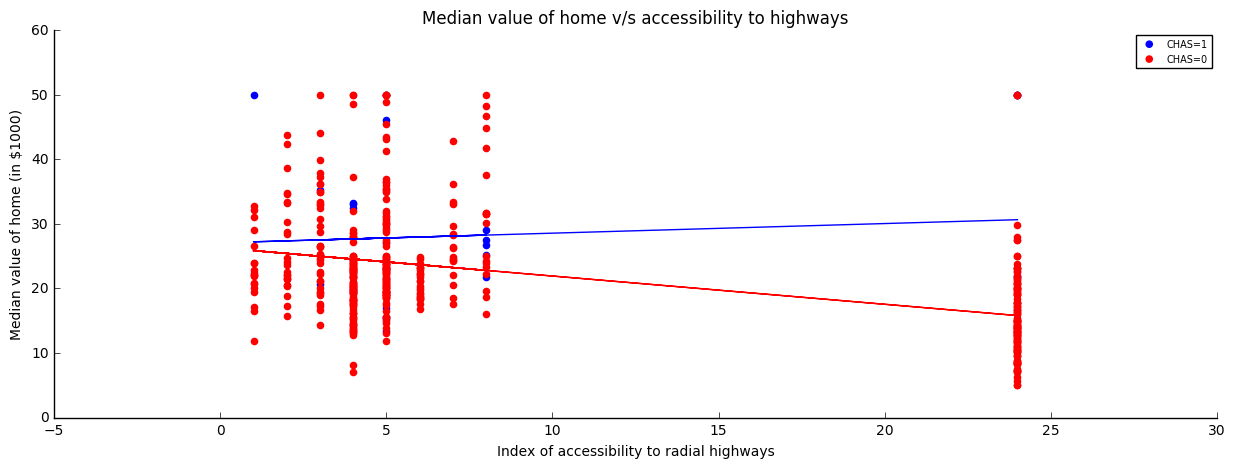

Thus, the regression in the case of CHAS =1 can be represented as y =  0.148845308371 * RAD + 27.0536122706  with a standard error of 0.248016557286

Similarly, the regression in the case of CHAS = 0 can be represented as y =  -0.437165350343 * RAD + 26.2761508888  with a standard error of 0.0420155974562


In [6]:
# Importing package needed for fitting linear regression
import scipy.stats as stats

# Spreading the plot to wider extent
plt.figure(figsize=(15,5))

# Extracting the parameters of fitted linear regression
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = stats.linregress(data[:,8][data[:,3]==1],data[:,13][data[:,3]==1])

# Creating a subplot of matplotlib to incorporate required modifications
ax = plt.subplot(111)

# Hiding the right and top axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# First scatterplot for CHAS=1
plot1 = plt.scatter(data[:,8][data[:,3]==1],data[:,13][data[:,3]==1], color='blue')

# Writing the equation of the regression line
y_2 = slope_2*data[:,8][data[:,3]==1]+intercept_2
# Adding the above line to earlier scatter plot
plt.plot(data[:,8][data[:,3]==1], y_2, 'b-')

# Extracting the parameters of fitted linear regression
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = stats.linregress(data[:,8][data[:,3]==0],data[:,13][data[:,3]==0])

# Second scatterplot for CHAS=0
plot2 = plt.scatter(data[:,8][data[:,3]==0],data[:,13][data[:,3]==0], color='red')

# Writing the equation of the regression line
y_3 = slope_3*data[:,8][data[:,3]==0]+intercept_3
# Adding the above line to earlier scatter plot
plt.plot(data[:,8][data[:,3]==0], y_3, 'r-')

# Adding legend to graph
plt.legend((plot1,plot2),
           ('CHAS=1','CHAS=0'),
           scatterpoints=1,
            loc='upper right',
           fontsize=7)

# Naming the title, x-axis and y-axis of the plot
plt.title("Median value of home v/s accessibility to highways")
plt.xlabel("Index of accessibility to radial highways")
plt.ylabel("Median value of home (in $1000)")
plt.show()

# Plotting a line y = slope*x where slope is determined from the above regression and x is the predictor variable, i.e., 'hour'
print 'Thus, the regression in the case of CHAS =1 can be represented as y = ',slope_2,'* RAD', '+', intercept_2,' with a standard error of',std_err_2

# Plotting a line y = slope*x where slope is determined from the above regression and x is the predictor variable, i.e., 'hour'
print '\nSimilarly, the regression in the case of CHAS = 0 can be represented as y = ',slope_3,'* RAD', '+', intercept_3,' with a standard error of',std_err_3

Thus, we understand that the correlation between median value of home and the index of accessibility to radial highways is postive if Charles tract bound river (CHAS=1) whereas the same correlation holds a negative value otherwise(CHAS=0.)

This shows us the importance of using a filter variable while analyzing the relationship between two other variables. The correlation may depend on the filter variables as well, like CHAS in the above case.

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers


In [7]:
# Defining the function which takes two arrays as inputs - predictions and yvalues
def compute_rmse(predictions, yvalues):
    # Calculating the resultant array of squared-difference between parallel entries of two arrays
    dif = (predictions-yvalues)**2
    # Defining RMSE equal to (sum of squares of difference)/(length of either array)
    rmse = np.sqrt(dif.sum()/float(len(predictions)))
    # Functions returns rmse as output
    return rmse

### 2.2 Divide data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [8]:
# leave the following line untouched, it will help ensure that our "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

# Defining a splitting function that takes as input the given array and percentage of split
def split(data, per_train):
    # Shuffled the input data randomly, based on the seed above
    np.random.shuffle(data)
    # Inserts the top train% rows (66 in this case) to the 'train' array
    train = data[0:per_train*len(data),:]
    # Inserts the bottom (1--0train)5 rows to the 'test' array
    test = data[per_train*len(data):len(data),:]
    # Return the resultant arrays
    return train, test

# Splitting the overall data to 66% in training and 34% in test and storing the resultants in bdata_train and bdata_test
bdata_train, bdata_test = split(data, 0.66)

/Users/rohanmanojthakkar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/rohanmanojthakkar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


### 2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this normal, and why?

In [9]:
# Applying the RSME function on 'target' column of train array and its mean value
print "RMSE of training set is",compute_rmse(bdata_train[:,13],[bdata_train[:,13].mean()])

# Applying the RSME function on 'target' column of test array and the mean value of train's 'target' column
print "RMSE of test set is",compute_rmse(bdata_test[:,13],[bdata_train[:,13].mean()])

RMSE of training set is 8.58496788378
RMSE of test set is 10.2816716248


I expected the RMSE to be higher for the test case as compared to the training because the basis of comparison was with the mean of median values of all tuples in the training set and it will be relatively closer to the range of values held by training as compared to the range of values held in the test set.  The above calculated values prove this assumption to be correct.

---

## Part 3: Nearest Neighbors


### 3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline computed above.  Soon we will implement the Nearest Neighbor algorithm, but first we need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that the function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [10]:
# Defining a new function 'distance' that takes as input two arrays and the value of L to calculate L-norm distance
def distance(x1, x2, L):
    # Returns the Lth power of absolute difference between x1 and x2
    dist = np.power(np.abs(x1-x2),L)
    # returns the array consisting of Lth root values of distance between every parallel combination of items from x1 and x2
    return np.power(dist.sum(axis=1),float(1)/L)

### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Our task is to implement a basic nearest neighbor algorithm from scratch.  Our simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, we are modelling the relationship between median home value and crime rates and house size.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by the code to predict the nearest neighbors for all the values in the test data set.

In [11]:
# To calculate total time required
import time

# To sort an array
import operator

# test = x, train = y, train's target = z, test's target = u, L = value of L for L-norm distance
def nneighbor(x, y, z, u, L):
    # Storing the start-time for reference
    start_time = time.time()
    # Defining a new list to store miinmum distance for each element in test array
    a = []
    # For each 'item' in test array
    for i in x:
        # Calculates the distance for an instance in test from each instance in train and store the resultant as an array
        dis = distance(i,y,L)
        # Combine distance array and train's 'target' column as one array
        yolo = np.column_stack((dis,z))
        # Sort the above 2-dimensional array in an ascending order of distance to get the entry with minimum distance
        yolo = sorted(yolo, key=operator.itemgetter(0), reverse=False)
        # Append the minimum distance to the final list
        a.append(yolo[0])
    # Convert list to array
    a = np.array(a)
    # Calculate the time taken by algorithm so far (to predict the nearest neighbors for all values in test array)
    t1 = float(round(time.time() - start_time,2))
    # Returns the above value of time and RMSE of 'target' values of test as compared to distance of each test case from its 
    # nearest neighbor
    return t1,compute_rmse(u,a[:,1])

# t = total time taken, n = RMSE
t,n = nneighbor(bdata_test[:,(0,5)], bdata_train[:,(0,5)],bdata_train[:,13],bdata_test[:,13],2)
print "RMSE is",n
print "Time taken is",t,"seconds"

RMSE is 7.45009989459
Time taken is 0.06 seconds


### 3.3 Results and Normalization

We also notice that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with our previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if we separately normalize each dataset using the respective mean and standard deviation.

In [12]:
def normalize(raw_data):
    # creates a new 1-D column array of zeros of length equal to number of rows in input data
    normalized_data = np.zeros((raw_data.shape[0]))
    # iterates through each column in input data
    for j in range(raw_data.shape[1]):
        # calculates the mean value of entries in jth column of input data
        mean = raw_data[:,j].mean()
        # calculates the standard deviation of entries in jth column of input data
        std = raw_data[:,j].std()
        # stores the noramlized value of all entries in jth column into another array
        a = (raw_data[:,j]-mean)/std
        # appends this array to original array which is to be returned
        normalized_data=np.column_stack((normalized_data,a))
    # converts the effective list of combined columns (noramlized data) into a 2-dimensional array   
    nor = np.array(normalized_data)
    # returns the entire array except for the first column which consists of only zeroes
    return nor[:,(xrange(1,raw_data.shape[1]+1))]
    

# Running the nneighbor algorithm on normalized CRIM and RM columns as input and un-normalized target values with L=2
t1, n1 = nneighbor(normalize(bdata_test[:,(0,5)]), normalize(bdata_train[:,(0,5)]),bdata_train[:,13],bdata_test[:,13],2)
print "RMSE is",n1
print "Time taken is",t1,"seconds"

RMSE is 7.73437264626
Time taken is 0.06 seconds


Thus, the RMSE for the case in which the columns are normalized (7.73) is slightly higher than the RMSE for the case in which the same columns are not normalized (7.45 in this case).  This explains the rightful importance of normalization in the nearest neighbor algorithm as normalization ensures that each features contributes appropriately to the final values.

### 3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  We try to increase the performance of our nearest neighbor algorithm by adding features that we think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L. 

What combination of features and distance function provide the lowest RMSE?  Do these decisions affect the running time of the algorithm?

In [13]:
# Running the nneighbor algorithm on normalized CRIM and RM columns as input and un-normalized target values with L=3
t2, n2 = nneighbor(normalize(bdata_test[:,(0,5)]), normalize(bdata_train[:,(0,5)]),bdata_train[:,13],bdata_test[:,13],3)

print "Time taken:",t2," seconds"
print "RMSE is",n2

# Running the nneighbor algorithm on normalized CRIM and RM columns as input and un-normalized target values with L=4
t3, n3 = nneighbor(normalize(bdata_test[:,(10,12)]), normalize(bdata_train[:,(10,12)]),bdata_train[:,13],bdata_test[:,13],4)

print "Time taken:",t3," seconds"
print "RMSE is",n3

# Running the nneighbor algorithm on normalized CRIM,RM,PTRATIO and LSTAT columns as input and un-normalized target values with L=2
t4, n4 = nneighbor(normalize(bdata_test[:,(0,5,10,12)]), normalize(bdata_train[:,(0,5,10,12)]),bdata_train[:,13],bdata_test[:,13],2)

print "Time taken:",t4," seconds"
print "RMSE is",n4

# Running the nneighbor algorithm on normalized CRIM,RM,PTRATIO and LSTAT columns as input and un-normalized target values with L=4
t5, n5 = nneighbor(normalize(bdata_test[:,(0,5,10,12)]), normalize(bdata_train[:,(0,5,10,12)]),bdata_train[:,13],bdata_test[:,13],4)

print "Time taken:",t5," seconds"
print "RMSE is",n5

Time taken: 0.05  seconds
RMSE is 7.75256437157
Time taken: 0.06  seconds
RMSE is 6.55767211622
Time taken: 0.06  seconds
RMSE is 5.99873782485
Time taken: 0.06  seconds
RMSE is 6.05098281799


On trying the some different combinations of features and L, we observe that the RMSE does, indeed, change a lot based on the features we choose but not a lot on the value of L.  We can assume that since the RMSEs for L=2 and L=3 are comparable while CRIM and RM features are considered(7.73 and 7.75).  Similarly, the RMSE for L=2 and L=4 are comparable while CRIM,RM,PTRATIO and LSTAT features are considered (5.99 and 6.05).

However, we maybe able to assume that on a general note, as more features are added, the RMSE decreased as web observe from above that RMSE for the case wherein CRIM,RM,PTRATIO and LSTAT features are considered as compared to the case wherein only CRIM and RM features are considered.  However, this assumption holds true as long as the number of features do not exceed the threeshold of overfitting the data in any given case.

On a general note, we can assume that the running time of the algorithm is higher for a higher value of k (for equal number of features) because of additional computation time required to incoporate these extra loops. Similarly, the running time is higher for a higher number of features (for a constant value of k).  However, in the above example, since there is only a minor difference in the values of k considered and the number of features observed, there is not much difference in running time of algorithm in the different cases.

### 3.5 Cross-Validation

The more we tinkered with features and distance function, the higher the risk that we overfit training data.  To prevent this sort of overfitting, we need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  

Let us use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide our dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [14]:
def k_fold(df,v,L,s,k,k_fold):
    # Setting the overall timer and sum of RMSEs to 0
    t_o = 0.0
    n_o = 0.0
    # for the number of folds
    for i in range(k_fold):
        # test array will consists of a different 10% subset of the overall arrau
        test = df[xrange(int(float(i)/10*df.shape[0]),int((float(i+1)/10)*df.shape[0])),:]
        # train = overall data - test data
        train = np.delete(df,(xrange(int(float(i)/10*df.shape[0]),int((float(i+1)/10)*df.shape[0]))), axis=0)
        # target values for test data
        v_test = v[xrange(int(float(i)/10*df.shape[0]),int((float(i+1)/10)*df.shape[0]))]
        # target values for train data
        v_train = np.delete(v,(xrange(int(float(i)/10*df.shape[0]),int((float(i+1)/10)*df.shape[0]))))
        # if implementing knn algorithm (defined later in the problem set)
        if s=='knn':
            t_n, n_n = knn(normalize(test), normalize(train),v_train,v_test,L,k)
        # if implementing nneighbor algorithm
        elif s=='nneighbor':
            t_n, n_n = nneighbor(normalize(test), normalize(train),v_train,v_test,L)
        # adding time taken for this iteration to total time
        t_o+=t_n
        # adding RMSE for this iteration to total RMSE value
        n_o+=n_n
    # Returns average RMSE across number of folds and total time taken
    return (n_o/k_fold), t_o

# Total time taken and RMSE for 10-fold cross validation on CRIM and RM input features
p,q = k_fold(data[:,(0,5)],data[:,13],2,'nneighbor',3,10)
print "Average RMSE is:",p
print "Total Time taken:",q," seconds"

Average RMSE is: 6.42725205407
Total Time taken: 0.2  seconds


### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [15]:
# test = x train = y
def knn(x, y, z, u, L, k):
    # storing start time
    start_time = time.time()
    # empty array to store distance and target values
    a = []
    # for each entry in test
    for i in x:
        # array of L-norm distance of that test entry from the entire train column
        dis = distance(i,y,L)
        # appending distance and target values to a single 2-D array
        yolo = np.column_stack((dis,z))
        # sorting the above array in an ascending order of distance
        yolo = sorted(yolo, key=operator.itemgetter(0), reverse=False)
        # Appending the mean distance across the k nearest neighbors to list a
        a.append(np.mean(yolo[0:k], axis = 0))
    # converting to array
    a = np.array(a)
    # Total time taken by algorithm
    t1 = float(round(time.time() - start_time,2))
    # returning time taken and RMSE of tagret values of train v/s test
    return t1,compute_rmse(u,a[:,1])
    
    
# runs a 10-fold cross validation for knn where k=3 for CRIM and RM columns
r,s = k_fold(data[:,(0,5)],data[:,13],2,'knn',3,10)
print "Average RMSE is:",r
print "Total Time taken:",s," seconds"

Average RMSE is: 5.88061503344
Total Time taken: 0.2  seconds


### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  We use the following features in our model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.

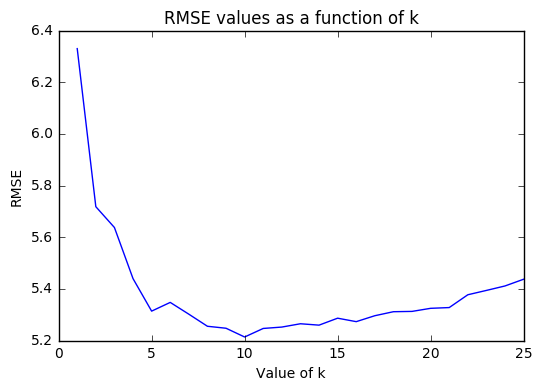

Thus, we can see that the RMSE attains its minimum value of 5.2135835165 for k = 10


In [16]:
# creating a new array with noramlized CRIM, ZN, RM, AGE, DIS and TAX columns as well as target values from original data
data_new = np.column_stack((normalize(data[:,(0,1,5,6,7,9)]),data[:,13]))

# Thus, order of columns in new data: (0-5)==(CRIM, ZN, RM, AGE, DIS, TAX); 6==target

# Empty lists
x=[]
y=[]

# for k=1 to k=25
for ele in xrange(1,26):
    # Calculating the RMSE and time taken 
    n,t = k_fold(data_new[:,0:5],data_new[:,6],2,'knn',ele,10)
    # Appending the value of iteration to x list
    x.append(ele)
    # Appending corresponding RMSE value to y list
    y.append(n)

# Creating a 2-D array with first column being x and second being y    
k_table = np.array(np.column_stack((x,y)))

# Plotting the RMSE values as a function of k
plt.plot(k_table[:,0],k_table[:,1])

# Renaming the title and the axes of the plot
plt.xlabel("Value of k")
plt.ylabel("RMSE")
plt.title("RMSE values as a function of k")

# display the plot
plt.show()

# Sorting the 2-D array according to increasing value of RMSE values
k_table = np.array(sorted(k_table, key=operator.itemgetter(1), reverse=False))

# Thus, the minimum possible value of RMSE will be the value at 1st row (row==0) and 1st column (col==0) of the sorted 2-D array
print "Thus, we can see that the RMSE attains its minimum value of",k_table[0][1],"for k =",int(k_table[0][0])

Here, we see that the function of RMSE v/s k is like a upper-facing curve with its local minima being at k=10, which means that the lowest value of RMSE is observed at k=10, i.e., for 10-nearest neighbors for k in the range of 1-25.  As a result, we may assume the 10 is a reasonable choice of k for this model as it minimizes the resultant RMSE value.

## Part 4: Principal Component Analysis

In [17]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
bdata = load_boston()

# Creating a final 2-dimensional array consisiting of total 14 columns - 13 indicator variables and target values
data = np.insert(bdata.data, bdata.data.shape[1], bdata.target, axis = 1)

# Function to standardize data
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

## Standardizing data
data = standardize(data)

### 4.2 So many scatterplots!

Let us choose 8 out of the 14 features of the housing data that we think are most interesting to study and create an 8x8 grid of scatterplots showing how each of these variables relate to each other.

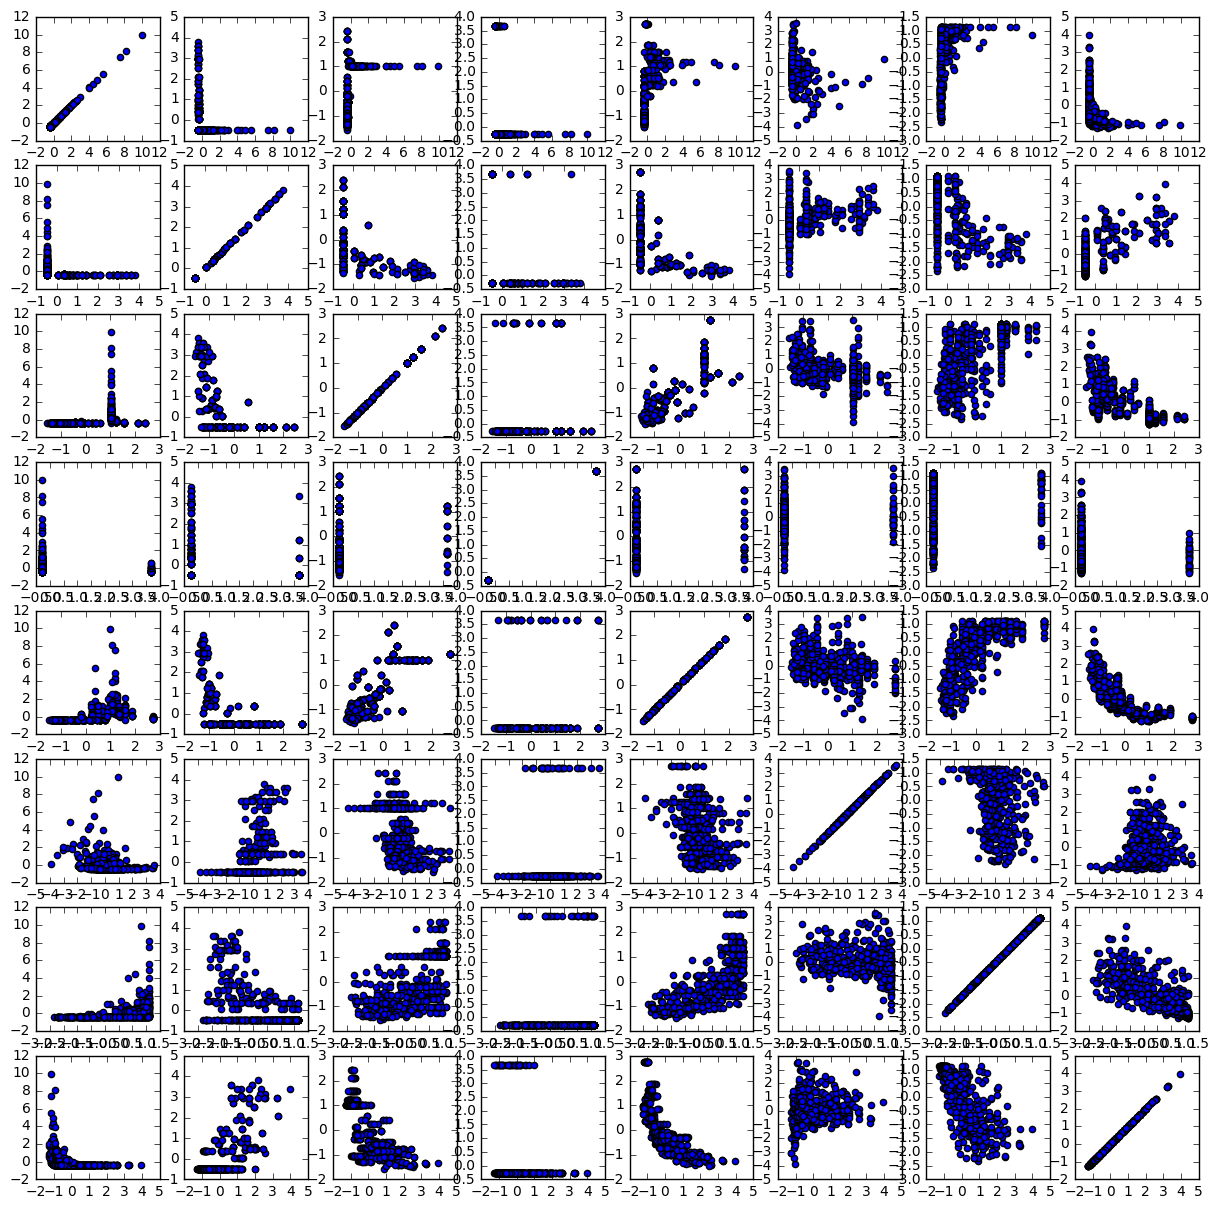

In [18]:
plt.figure(figsize=(15,15))
for i in xrange(8):
    for j in xrange(8):
        plt.subplot(8, 8, i * 8 + j + 1)
        # Scatter plot on ith column and jth column of data array
        plt.scatter(data[:,i],data[:,j])

### 4.3 PCA to the rescue

Now, we run principal component analysis using [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from sklearn to find the first 12 principal components of our data.  Using only our training set all features *except* the median housing price.  

We create a figure showing how the amount of variance explained by our components increases as we increase the number of components from 1 to 12.

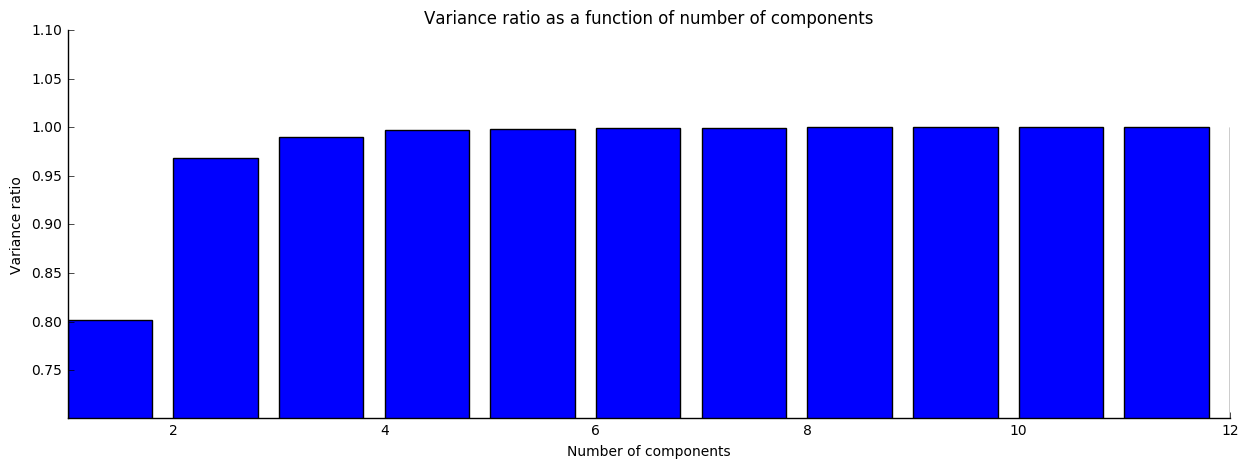

In [19]:
plt.figure(figsize=(15,5))

# Creating a subplot of matplotlib to incorporate required modifications
ax = plt.subplot(111)

# Hiding the right and top axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#3 Training PCA model
pca = sklearn.decomposition.PCA(n_components=12)
## all features except the housing price
pca.fit(bdata_train[:,range(13)])
result = pca.explained_variance_ratio_

# Temporary sum of variance ratio
sum = 0

# To use in graph
Y_axis = []
for i in result:
    # Adding new variance ratio to temp sum and inserting the same in Y-axis
    sum+=i
    Y_axis.append(sum)

# No of components    
X_axis = [1,2,3,4,5,6,7,8,9,10,11,12]

# Bar graph
plt.bar(X_axis, Y_axis)

# To better visualize the increase in variance ratios as no of components increase
plt.ylim([Y_axis[0]-0.1,1.1])
plt.xlim([1,12])

# Labeling graph
plt.xlabel("Number of components")
plt.ylabel("Variance ratio")
plt.title("Variance ratio as a function of number of components")

plt.show()

Thus, we understand from the graph that as number of components increases, variance ratio increases. However, the increase in variance ratio reduces as more and more components are added. We can see from the above graph that the variance ratio for 7 components is similar to the variance ratio for 12.

### 4.4 Visualizing the components

Create a 1X3 grid containing three scatter plots of the training data:

1. PCA 1 vs. PCA 2 (we will need to use `fit_transform` to project the training data onto these two components)
2. PCA 1 (x-axis) vs. median housing value
3. PCA 2 vs. median housing value

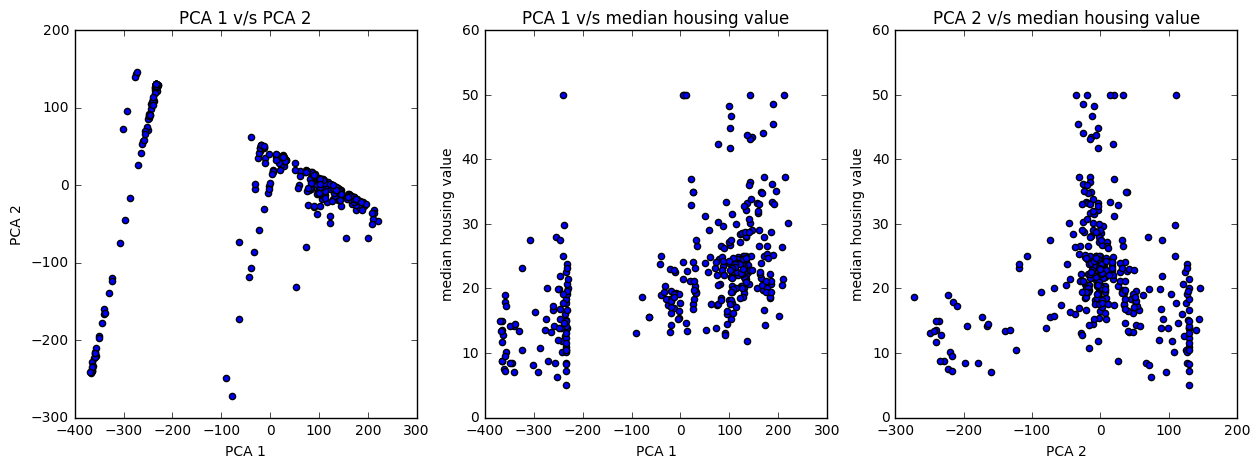

In [20]:
pca1 = sklearn.decomposition.PCA(n_components=12)

array = pca1.fit_transform(bdata_train[:,range(13)])

plt.figure(figsize=(15,5))

## PCA 1 v/s PCA 2
plt.subplot(1, 3, 1)
plt.scatter(array[:,0],array[:,1])
plt.title("PCA 1 v/s PCA 2")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

## PCA 1 v/s median housing value
plt.subplot(1, 3, 2)
plt.scatter(array[:,0],bdata_train[:,13])
plt.title("PCA 1 v/s median housing value")
plt.xlabel("PCA 1")
plt.ylabel("median housing value")

## PCA 2 v/s median housing value
plt.subplot(1, 3, 3)
plt.scatter(array[:,1],bdata_train[:,13])
plt.title("PCA 2 v/s median housing value")
plt.xlabel("PCA 2")
plt.ylabel("median housing value")

### 4.5 Regression and PCA

Using just the first Principal Component learned on the training data, project all of the data (including the test data) onto this 1-dimensional subspace using the `fit_transform` function.  Now, using our training data, fit a regression of median housing price on this first principal component of the data.  Report the RMSE of this regression for both the training and test set.  How do these results compare to our results from 4.1?

In [21]:
## PCA on housing prices of training data
output = pca.fit_transform(bdata_train[:,range(13)])


## PCA on housing prices of test data
output_1 = pca.fit_transform(bdata_test[:,range(13)])

# Extracting the parameters of fitted linear regression
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = stats.linregress(output[:,0], bdata_train[:,13])

# Writing the equation of the regression line for train
y_train_1 = slope_3*output[:,0]+intercept_2

# Writing the equation of the regression line for test
y_test_1 = slope_3*output_1[:,0]+intercept_2

## RMSE of first predictions for training data
print 'RMSE of training data is =', sqrt(mean_squared_error(bdata_train[:,13],y_train_1))

## RMSE of first predictions for test data
print 'RMSE of test data is =',sqrt(mean_squared_error(bdata_test[:,13],y_test_1))

RMSE of training data is =

NameError: name 'sqrt' is not defined

As expected the RMSE is higher for the test data as compaed to the training data since the regression is fit on the training data.  When compared to the values of RMSE in Question 4.1, the RMSEs for both (training and test) are slightly higher in this question because while in 4.1, only one feature ' avergae number of rooms per dwelling' was considered, the regression in this question considers more than 1 feature (although not all features) and we have earlier observed that as number of components increases, the variance ratio increases.